# Visualizaciones del Dataset de Películas

Este notebook contiene visualizaciones comprehensivas para entender mejor los patrones, tendencias y características del dataset de películas.

## Objetivos:
1. Crear visualizaciones que muestren la distribución de variables clave
2. Analizar tendencias temporales en la industria cinematográfica
3. Explorar relaciones entre diferentes características de las películas
4. Identificar patrones en géneros, directores y ratings
5. Generar insights visuales para el sistema de recomendaciones

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurar matplotlib para mejor visualización
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [3]:
# Cargar los datos
df = pd.read_csv('../data/movie.csv')
print(f"Dataset cargado con {df.shape[0]} películas")

# Preparar datos para visualizaciones
df_clean = df.copy()
# Convertir Revenue a numérico (manejar valores nulos)
df_clean['Revenue (Millions)'] = pd.to_numeric(df_clean['Revenue (Millions)'], errors='coerce')
df_clean['Metascore'] = pd.to_numeric(df_clean['Metascore'], errors='coerce')

print("Datos preparados para visualización")

Dataset cargado con 1000 películas
Datos preparados para visualización


## 1. Distribuciones de Variables Principales

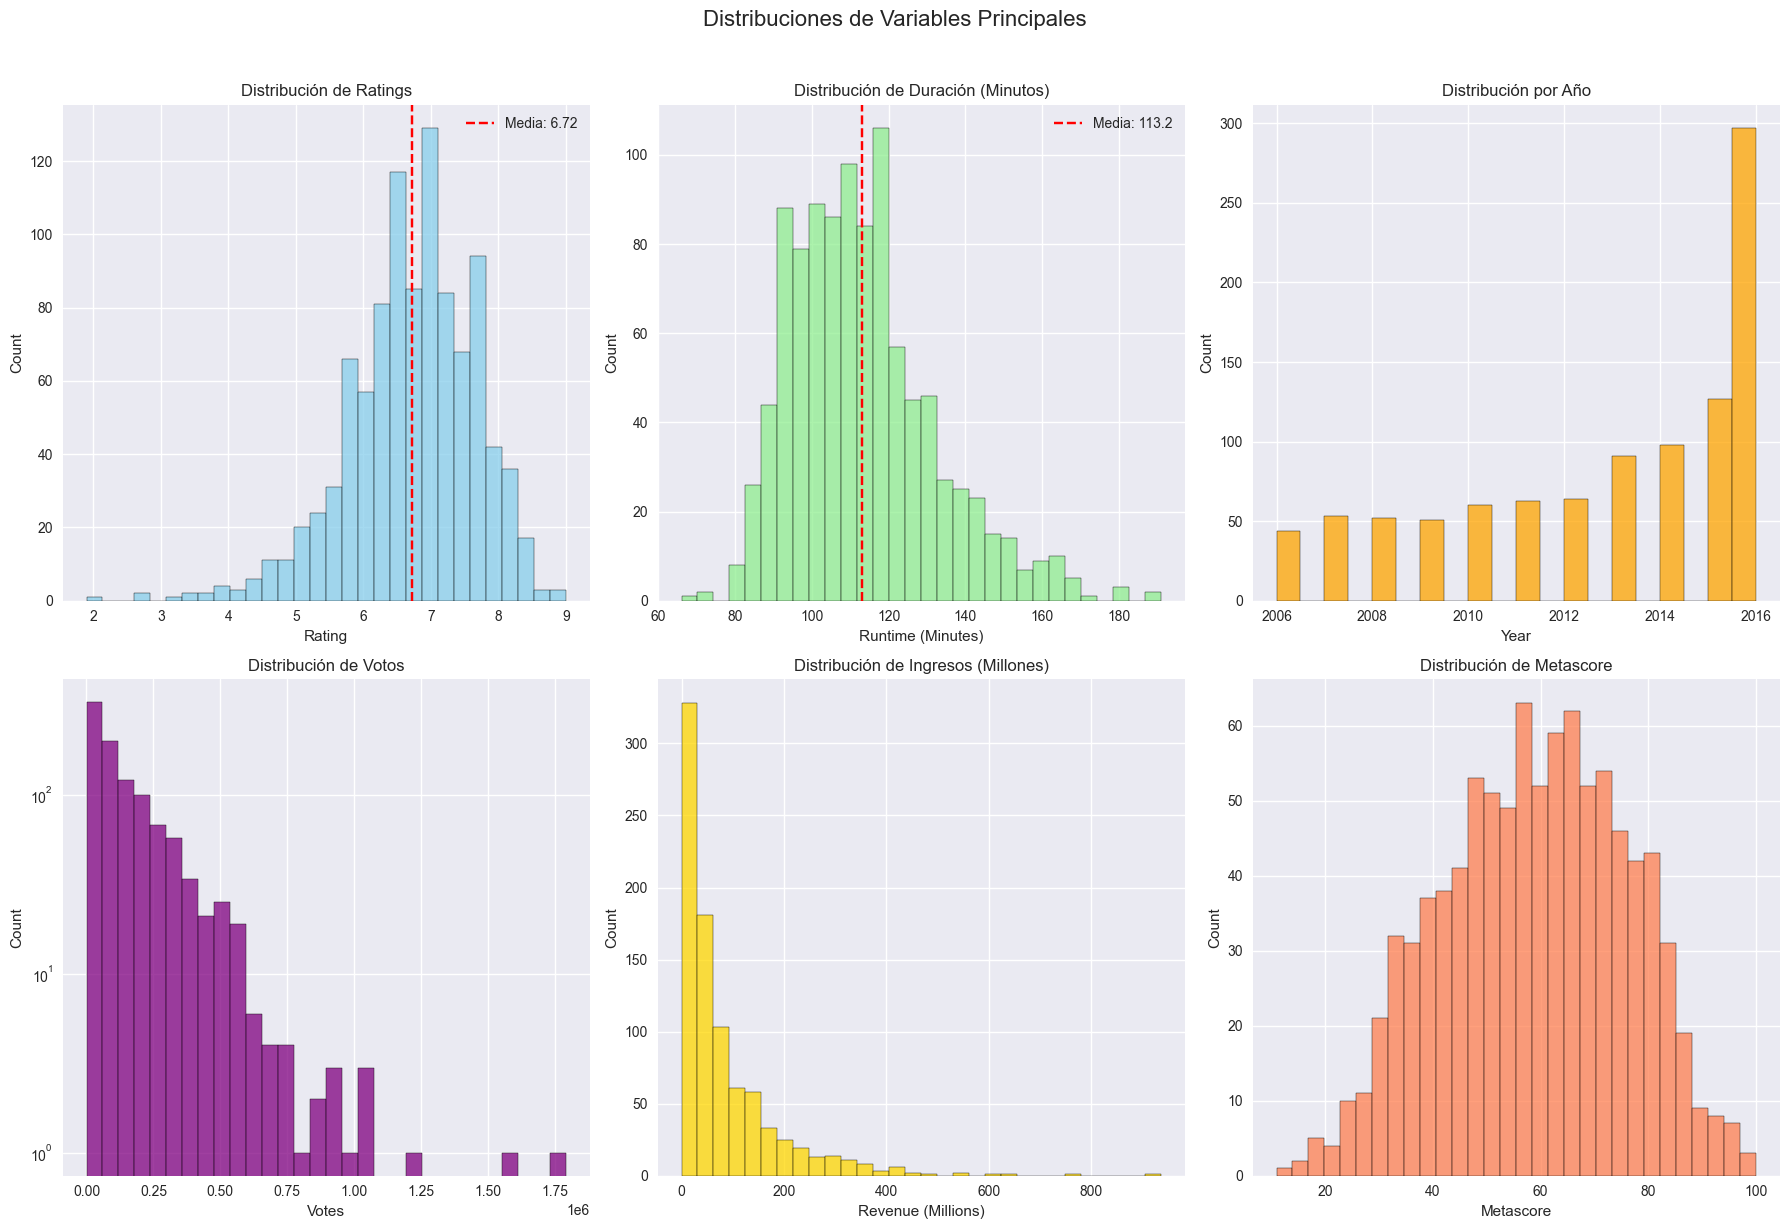

In [4]:
# Distribuciones de variables numéricas principales
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuciones de Variables Principales', fontsize=16, y=1.02)

# Rating
sns.histplot(data=df_clean, x='Rating', bins=30, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribución de Ratings')
axes[0,0].axvline(df_clean['Rating'].mean(), color='red', linestyle='--', label=f'Media: {df_clean["Rating"].mean():.2f}')
axes[0,0].legend()

# Runtime
sns.histplot(data=df_clean, x='Runtime (Minutes)', bins=30, ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Distribución de Duración (Minutos)')
axes[0,1].axvline(df_clean['Runtime (Minutes)'].mean(), color='red', linestyle='--', label=f'Media: {df_clean["Runtime (Minutes)"].mean():.1f}')
axes[0,1].legend()

# Year
sns.histplot(data=df_clean, x='Year', bins=20, ax=axes[0,2], color='orange')
axes[0,2].set_title('Distribución por Año')

# Votes (log scale para mejor visualización)
votes_clean = df_clean[df_clean['Votes'] > 0]['Votes']
sns.histplot(data=votes_clean, bins=30, ax=axes[1,0], color='purple')
axes[1,0].set_title('Distribución de Votos')
axes[1,0].set_yscale('log')

# Revenue
revenue_clean = df_clean.dropna(subset=['Revenue (Millions)'])
if len(revenue_clean) > 0:
    sns.histplot(data=revenue_clean, x='Revenue (Millions)', bins=30, ax=axes[1,1], color='gold')
    axes[1,1].set_title('Distribución de Ingresos (Millones)')

# Metascore
metascore_clean = df_clean.dropna(subset=['Metascore'])
if len(metascore_clean) > 0:
    sns.histplot(data=metascore_clean, x='Metascore', bins=30, ax=axes[1,2], color='coral')
    axes[1,2].set_title('Distribución de Metascore')

plt.tight_layout()
plt.show()

## 2. Análisis de Géneros

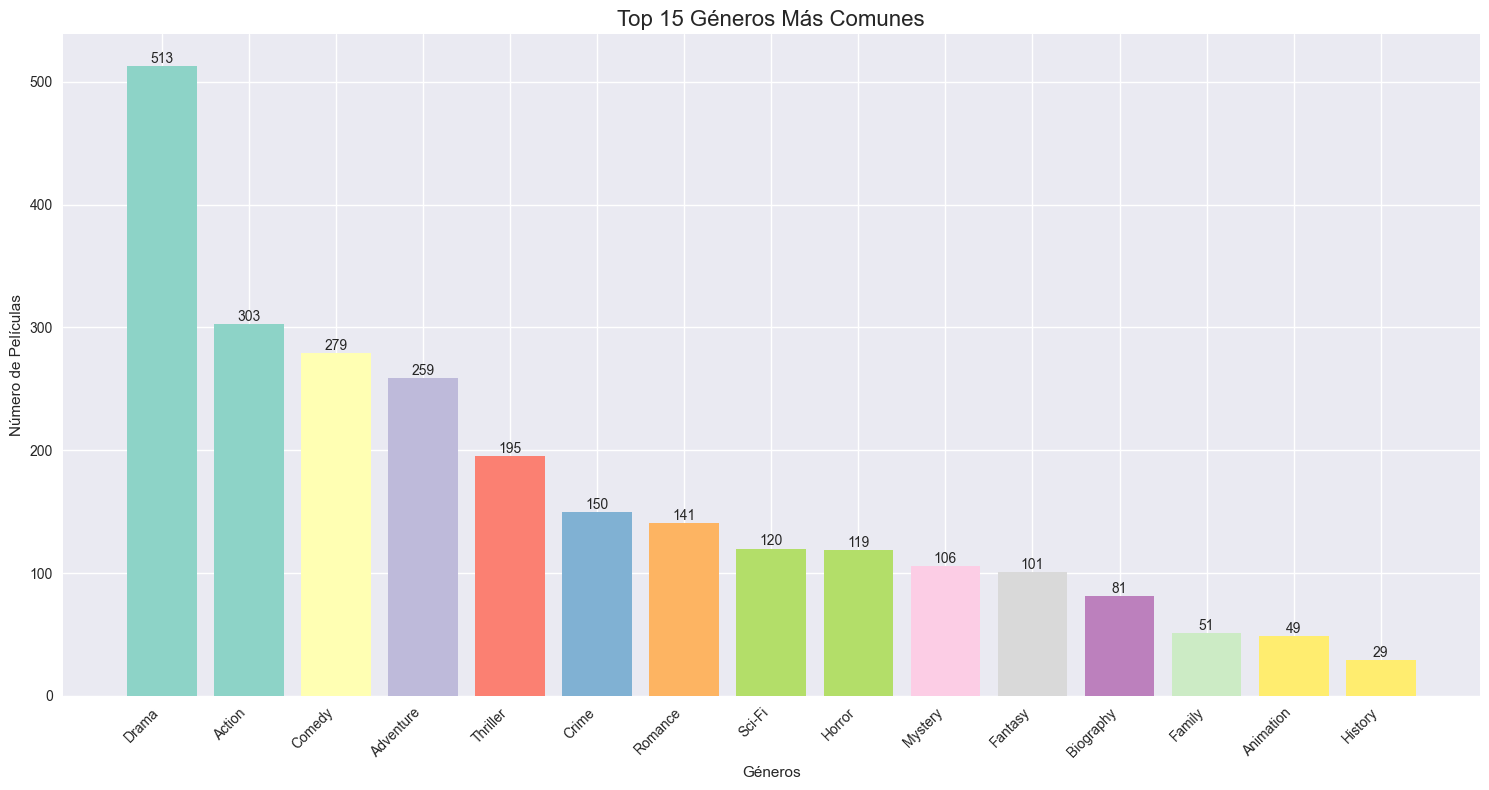

Análisis de Ratings por Género:
      Género  Rating_Promedio
0      Drama         6.953801
9    Mystery         6.886792
5      Crime         6.786667
3  Adventure         6.772201
7     Sci-Fi         6.716667
6    Romance         6.685816
2     Comedy         6.647670
1     Action         6.614521
4   Thriller         6.593333
8     Horror         6.089916


In [5]:
# Análisis de géneros
genres_expanded = df_clean['Genre'].str.split(',').explode().str.strip()
genre_counts = genres_expanded.value_counts()

# Gráfico de barras de los géneros más comunes
plt.figure(figsize=(15, 8))
top_genres = genre_counts.head(15)
bars = plt.bar(range(len(top_genres)), top_genres.values, color=plt.cm.Set3(np.linspace(0, 1, len(top_genres))))
plt.title('Top 15 Géneros Más Comunes', fontsize=16)
plt.xlabel('Géneros')
plt.ylabel('Número de Películas')
plt.xticks(range(len(top_genres)), top_genres.index, rotation=45, ha='right')

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Análisis de ratings por género (top 10)
print("Análisis de Ratings por Género:")
genre_ratings = {}
for genre in top_genres.head(10).index:
    mask = df_clean['Genre'].str.contains(genre, case=False, na=False)
    genre_ratings[genre] = df_clean[mask]['Rating'].mean()

genre_ratings_df = pd.DataFrame(list(genre_ratings.items()), 
                               columns=['Género', 'Rating_Promedio']).sort_values('Rating_Promedio', ascending=False)
print(genre_ratings_df)

## 3. Tendencias Temporales

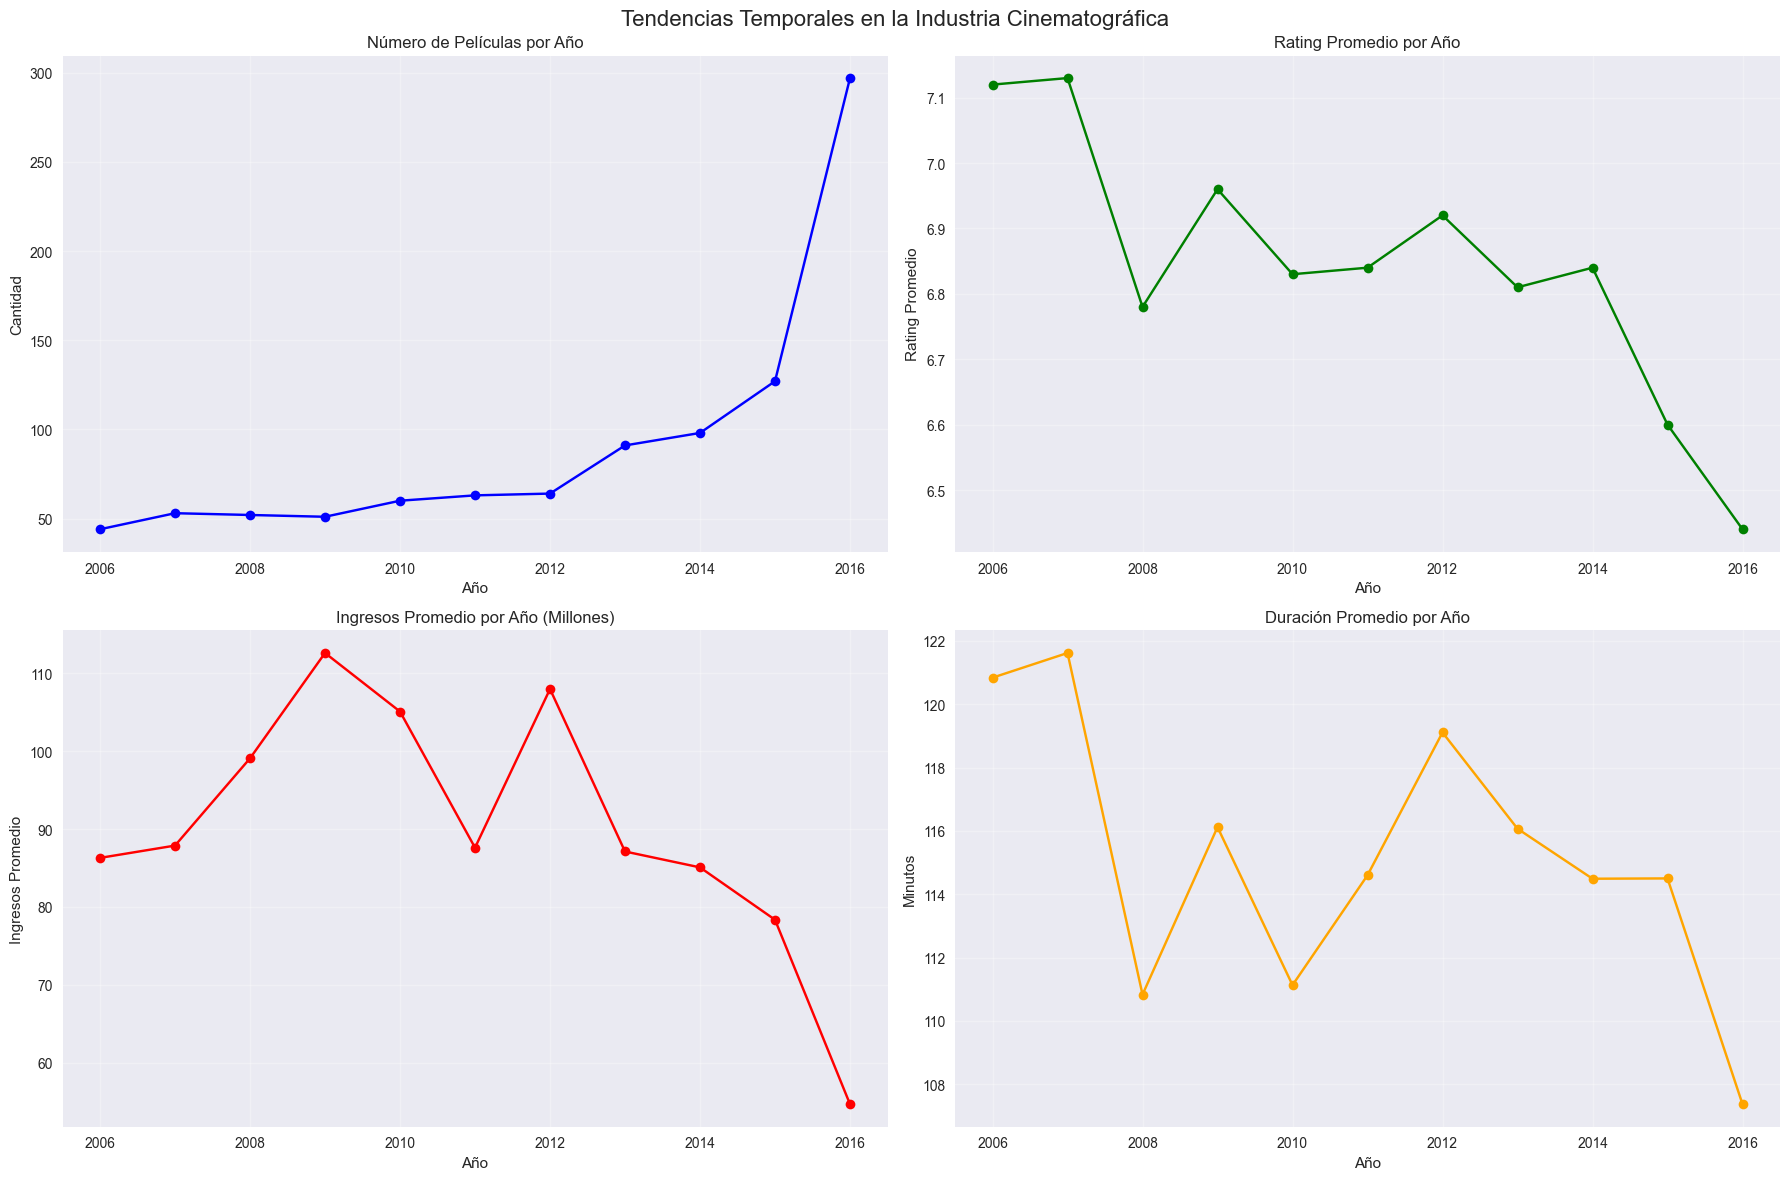

In [6]:
# Tendencias temporales
yearly_stats = df_clean.groupby('Year').agg({
    'Rating': ['count', 'mean'],
    'Revenue (Millions)': 'mean',
    'Runtime (Minutes)': 'mean'
}).round(2)

yearly_stats.columns = ['Cantidad', 'Rating_Promedio', 'Revenue_Promedio', 'Runtime_Promedio']
yearly_stats = yearly_stats.reset_index()

# Crear subplots para tendencias temporales
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Tendencias Temporales en la Industria Cinematográfica', fontsize=16)

# Número de películas por año
axes[0,0].plot(yearly_stats['Year'], yearly_stats['Cantidad'], marker='o', color='blue')
axes[0,0].set_title('Número de Películas por Año')
axes[0,0].set_xlabel('Año')
axes[0,0].set_ylabel('Cantidad')
axes[0,0].grid(True, alpha=0.3)

# Rating promedio por año
axes[0,1].plot(yearly_stats['Year'], yearly_stats['Rating_Promedio'], marker='o', color='green')
axes[0,1].set_title('Rating Promedio por Año')
axes[0,1].set_xlabel('Año')
axes[0,1].set_ylabel('Rating Promedio')
axes[0,1].grid(True, alpha=0.3)

# Revenue promedio por año (excluyendo nulos)
revenue_by_year = yearly_stats.dropna(subset=['Revenue_Promedio'])
if len(revenue_by_year) > 0:
    axes[1,0].plot(revenue_by_year['Year'], revenue_by_year['Revenue_Promedio'], marker='o', color='red')
    axes[1,0].set_title('Ingresos Promedio por Año (Millones)')
    axes[1,0].set_xlabel('Año')
    axes[1,0].set_ylabel('Ingresos Promedio')
    axes[1,0].grid(True, alpha=0.3)

# Duración promedio por año
axes[1,1].plot(yearly_stats['Year'], yearly_stats['Runtime_Promedio'], marker='o', color='orange')
axes[1,1].set_title('Duración Promedio por Año')
axes[1,1].set_xlabel('Año')
axes[1,1].set_ylabel('Minutos')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Correlaciones y Relaciones

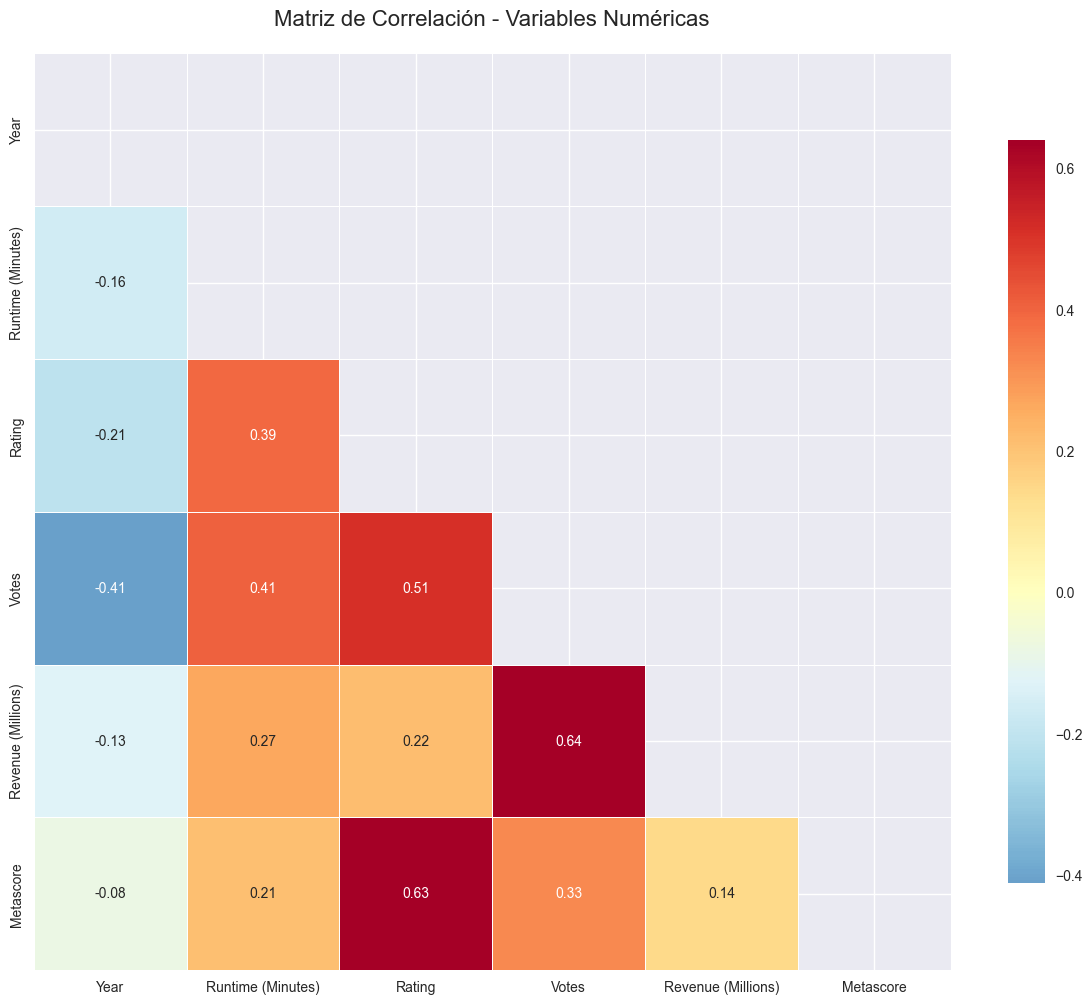

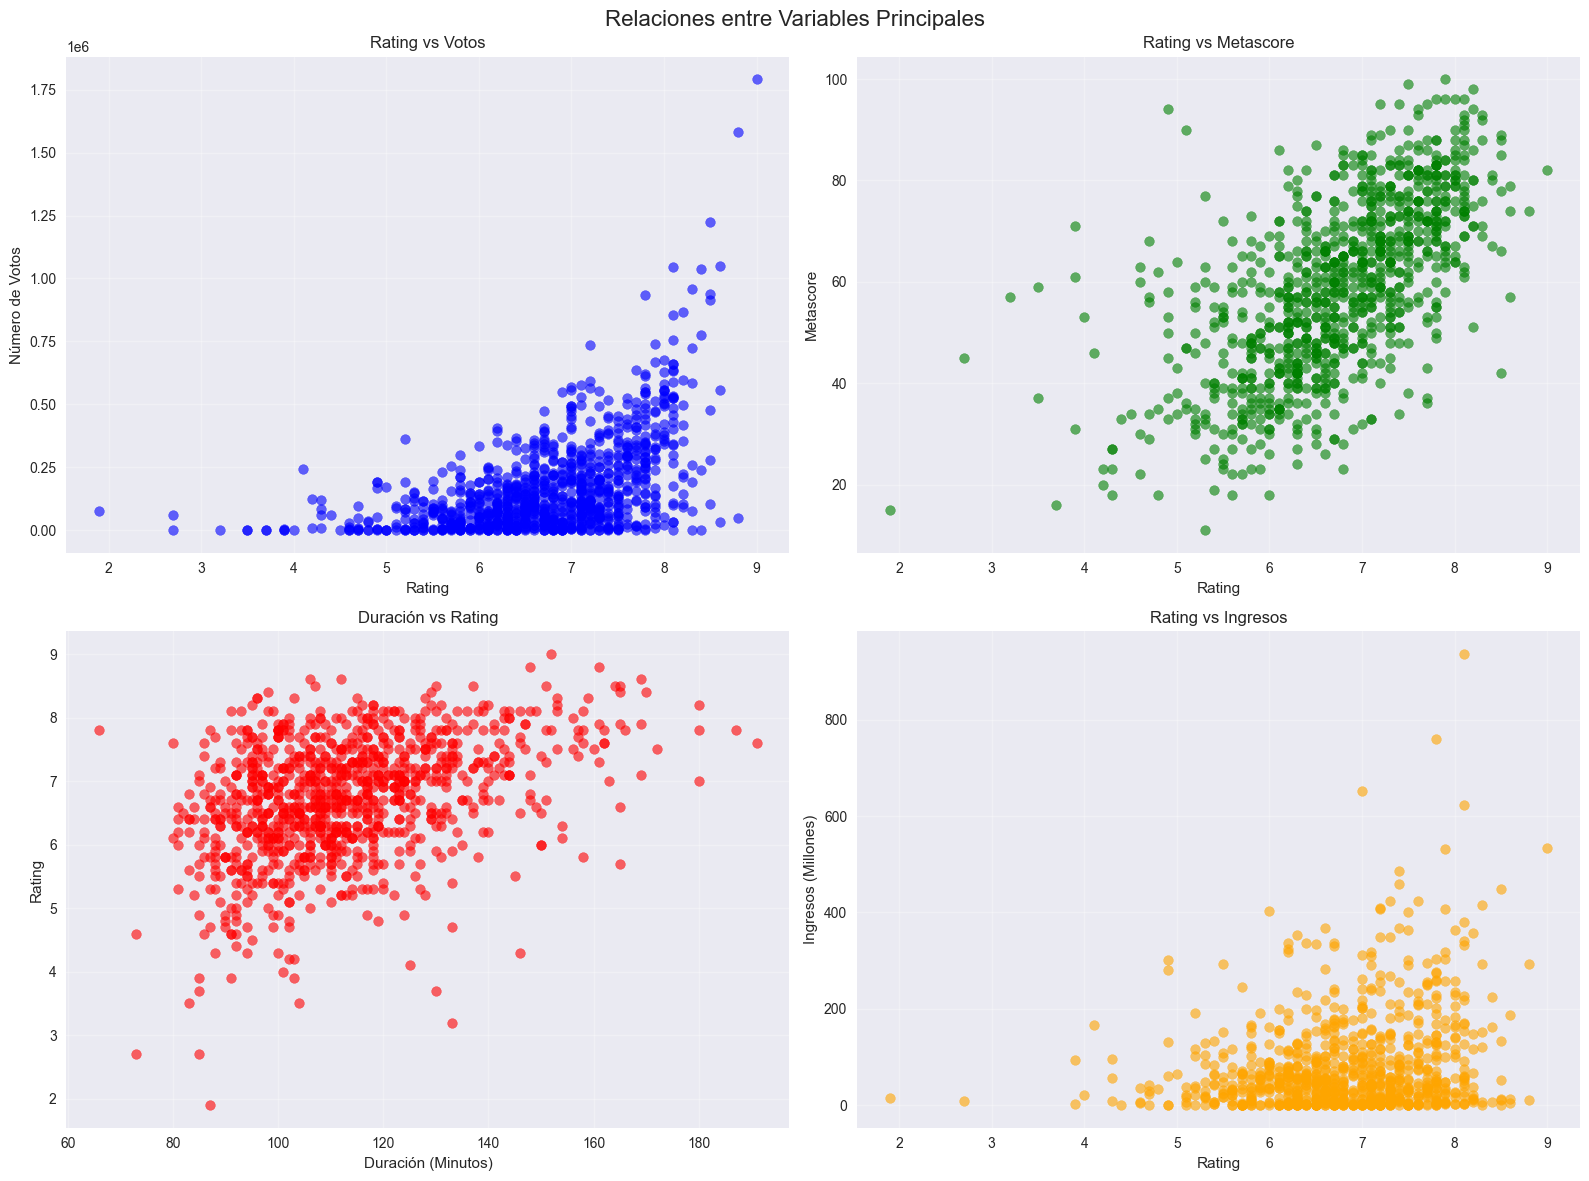

In [7]:
# Matriz de correlación mejorada
numerical_cols = ['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']
df_corr = df_clean[numerical_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Scatter plots de las correlaciones más interesantes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Relaciones entre Variables Principales', fontsize=16)

# Rating vs Votes
axes[0,0].scatter(df_clean['Rating'], df_clean['Votes'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Número de Votos')
axes[0,0].set_title('Rating vs Votos')
axes[0,0].grid(True, alpha=0.3)

# Rating vs Metascore (solo datos disponibles)
df_meta = df_clean.dropna(subset=['Metascore'])
if len(df_meta) > 0:
    axes[0,1].scatter(df_meta['Rating'], df_meta['Metascore'], alpha=0.6, color='green')
    axes[0,1].set_xlabel('Rating')
    axes[0,1].set_ylabel('Metascore')
    axes[0,1].set_title('Rating vs Metascore')
    axes[0,1].grid(True, alpha=0.3)

# Runtime vs Rating
axes[1,0].scatter(df_clean['Runtime (Minutes)'], df_clean['Rating'], alpha=0.6, color='red')
axes[1,0].set_xlabel('Duración (Minutos)')
axes[1,0].set_ylabel('Rating')
axes[1,0].set_title('Duración vs Rating')
axes[1,0].grid(True, alpha=0.3)

# Revenue vs Rating (solo datos disponibles)
df_revenue = df_clean.dropna(subset=['Revenue (Millions)'])
if len(df_revenue) > 0:
    axes[1,1].scatter(df_revenue['Rating'], df_revenue['Revenue (Millions)'], alpha=0.6, color='orange')
    axes[1,1].set_xlabel('Rating')
    axes[1,1].set_ylabel('Ingresos (Millones)')
    axes[1,1].set_title('Rating vs Ingresos')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Top Performers y Outliers

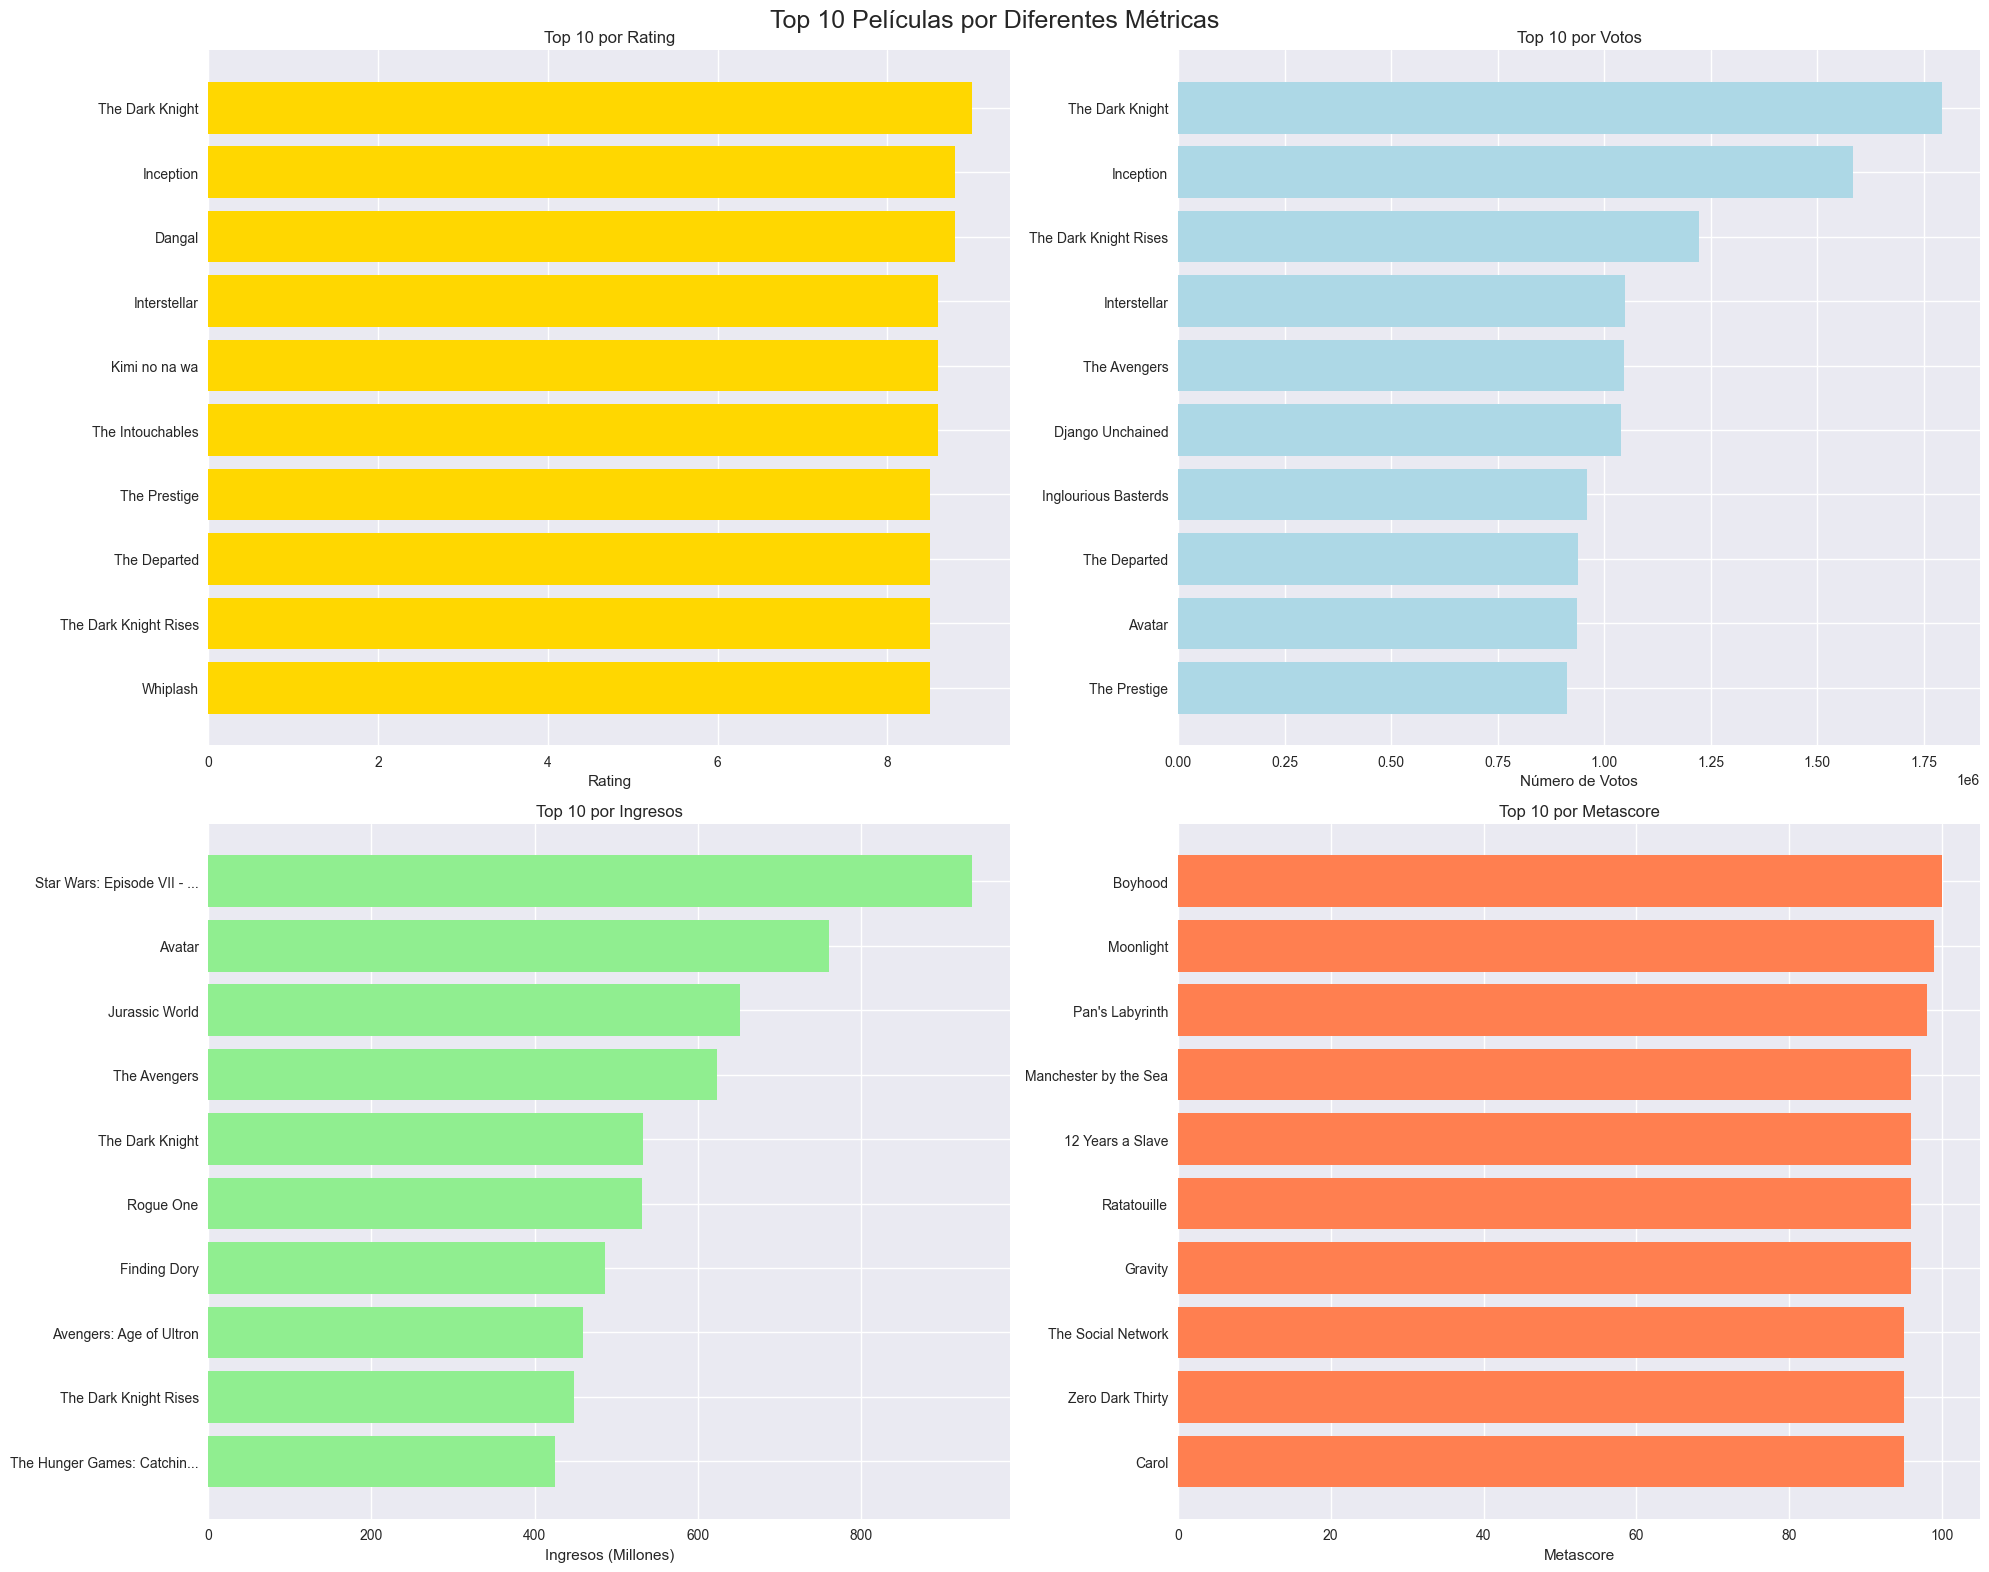

In [8]:
# Top películas por diferentes métricas
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Top 10 Películas por Diferentes Métricas', fontsize=18)

# Top por Rating
top_rating = df_clean.nlargest(10, 'Rating')
axes[0,0].barh(range(len(top_rating)), top_rating['Rating'], color='gold')
axes[0,0].set_yticks(range(len(top_rating)))
axes[0,0].set_yticklabels([f"{title[:25]}..." if len(title) > 25 else title 
                          for title in top_rating['Title']], fontsize=10)
axes[0,0].set_xlabel('Rating')
axes[0,0].set_title('Top 10 por Rating')
axes[0,0].invert_yaxis()

# Top por Votos
top_votes = df_clean.nlargest(10, 'Votes')
axes[0,1].barh(range(len(top_votes)), top_votes['Votes'], color='lightblue')
axes[0,1].set_yticks(range(len(top_votes)))
axes[0,1].set_yticklabels([f"{title[:25]}..." if len(title) > 25 else title 
                          for title in top_votes['Title']], fontsize=10)
axes[0,1].set_xlabel('Número de Votos')
axes[0,1].set_title('Top 10 por Votos')
axes[0,1].invert_yaxis()

# Top por Ingresos
df_revenue_clean = df_clean.dropna(subset=['Revenue (Millions)'])
if len(df_revenue_clean) > 0:
    top_revenue = df_revenue_clean.nlargest(10, 'Revenue (Millions)')
    axes[1,0].barh(range(len(top_revenue)), top_revenue['Revenue (Millions)'], color='lightgreen')
    axes[1,0].set_yticks(range(len(top_revenue)))
    axes[1,0].set_yticklabels([f"{title[:25]}..." if len(title) > 25 else title 
                              for title in top_revenue['Title']], fontsize=10)
    axes[1,0].set_xlabel('Ingresos (Millones)')
    axes[1,0].set_title('Top 10 por Ingresos')
    axes[1,0].invert_yaxis()

# Top por Metascore
df_meta_clean = df_clean.dropna(subset=['Metascore'])
if len(df_meta_clean) > 0:
    top_meta = df_meta_clean.nlargest(10, 'Metascore')
    axes[1,1].barh(range(len(top_meta)), top_meta['Metascore'], color='coral')
    axes[1,1].set_yticks(range(len(top_meta)))
    axes[1,1].set_yticklabels([f"{title[:25]}..." if len(title) > 25 else title 
                              for title in top_meta['Title']], fontsize=10)
    axes[1,1].set_xlabel('Metascore')
    axes[1,1].set_title('Top 10 por Metascore')
    axes[1,1].invert_yaxis()

plt.tight_layout()
plt.show()

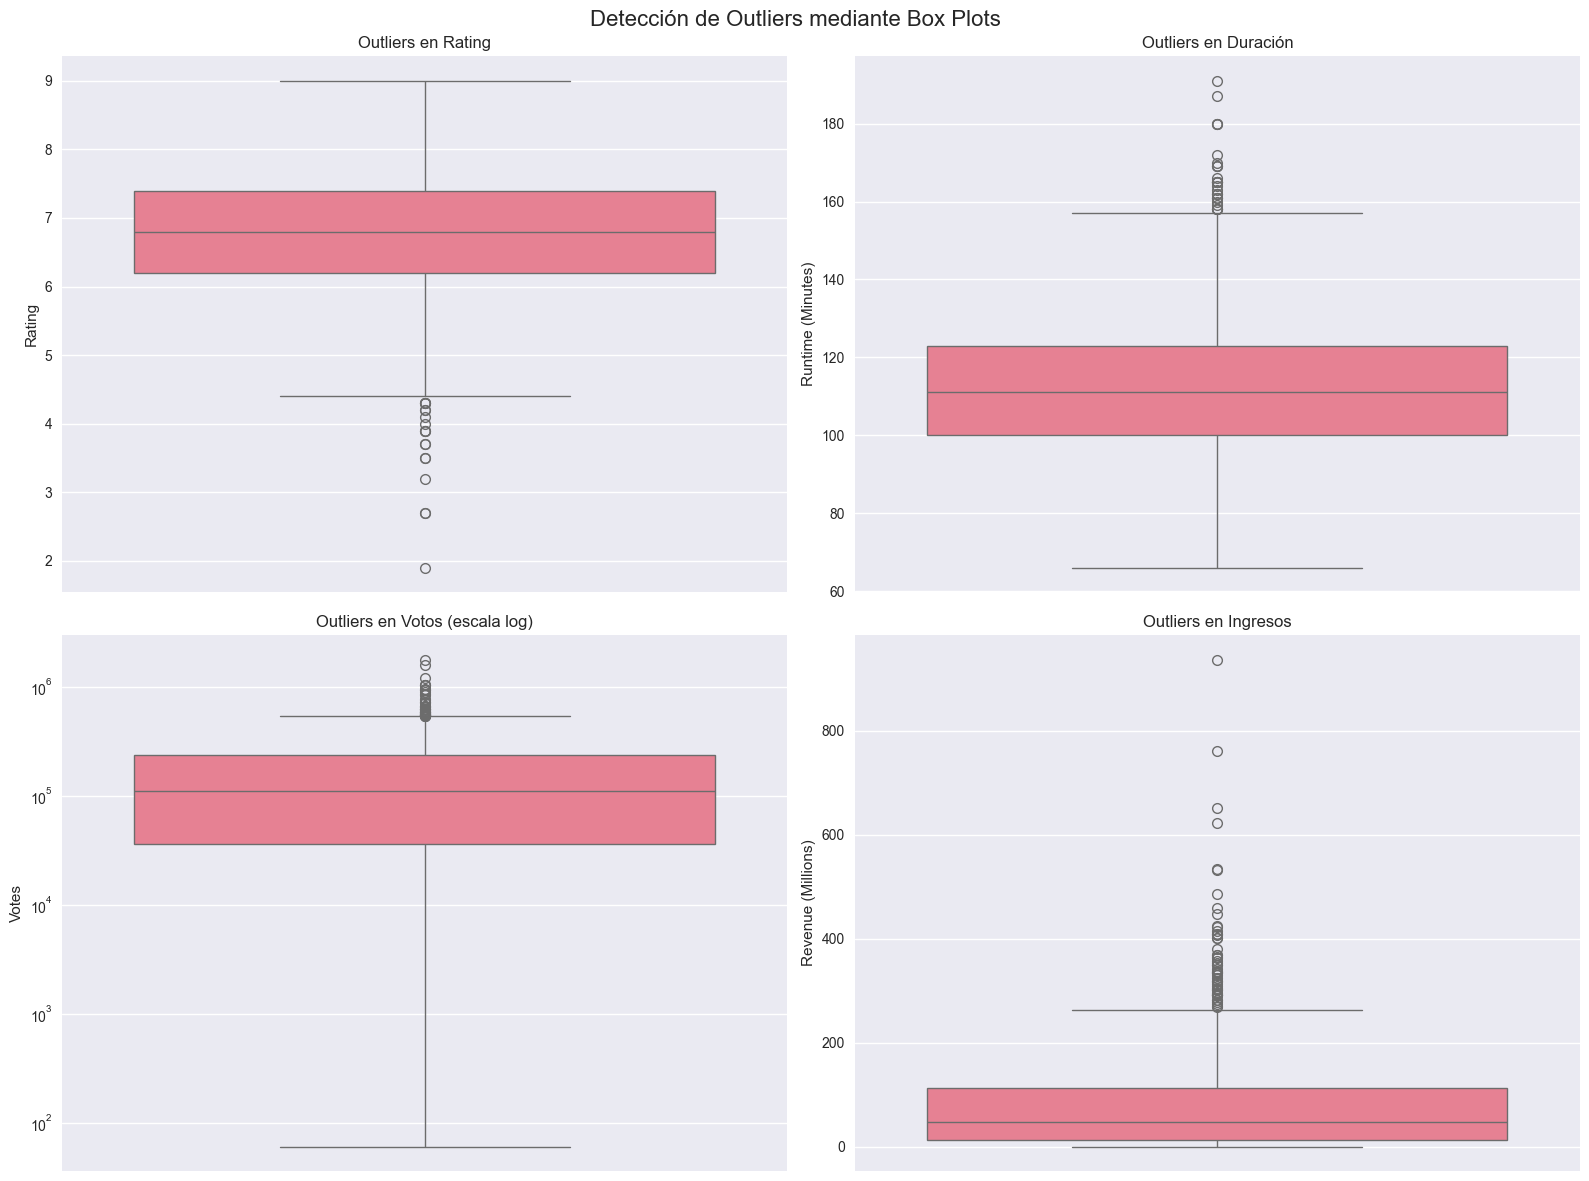

📊 RESUMEN DE VISUALIZACIONES:
✓ Distribuciones de variables principales creadas
✓ Análisis de géneros completado
✓ Tendencias temporales visualizadas
✓ Matriz de correlación generada
✓ Top performers identificados
✓ Outliers detectados visualmente


In [9]:
# Box plots para identificar outliers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Detección de Outliers mediante Box Plots', fontsize=16)

# Rating
sns.boxplot(data=df_clean, y='Rating', ax=axes[0,0])
axes[0,0].set_title('Outliers en Rating')

# Runtime
sns.boxplot(data=df_clean, y='Runtime (Minutes)', ax=axes[0,1])
axes[0,1].set_title('Outliers en Duración')

# Votes (log scale)
sns.boxplot(data=df_clean[df_clean['Votes'] > 0], y='Votes', ax=axes[1,0])
axes[1,0].set_yscale('log')
axes[1,0].set_title('Outliers en Votos (escala log)')

# Revenue
if len(df_revenue_clean) > 0:
    sns.boxplot(data=df_revenue_clean, y='Revenue (Millions)', ax=axes[1,1])
    axes[1,1].set_title('Outliers en Ingresos')

plt.tight_layout()
plt.show()

print("📊 RESUMEN DE VISUALIZACIONES:")
print("="*50)
print("✓ Distribuciones de variables principales creadas")
print("✓ Análisis de géneros completado")
print("✓ Tendencias temporales visualizadas")
print("✓ Matriz de correlación generada")
print("✓ Top performers identificados")
print("✓ Outliers detectados visualmente")